In [1]:
import networkx as nx
import pandas as pd
from collections import Counter

%matplotlib inline

### Intro to networkx

We begin by reading the full IMDb graph into a networkx graph object.

There are several methods you can call on a `networkx` graph object. Below shows the methods you can use to get the number of _nodes_ and _edges_.

In [2]:
G = nx.read_edgelist('data/imdb_edges.tsv', delimiter='\t')

print('# nodes:', G.number_of_nodes())
print('# edges:', G.number_of_edges())

# nodes: 97944
# edges: 154795


The `networkx` module also has some nice functions we will use. First up: A shortest path algorithm! We'll see we get the same answers as our code from morning.

In [3]:
print(nx.shortest_path(G, 'Kevin Bacon', 'Julia Roberts'))

['Kevin Bacon', 'Beyond All Boundaries', 'Tom Hanks', 'Larry Crowne', 'Julia Roberts']


In [4]:
# We can also find ALL shortest paths. Just like this morning, we find that there are 7 shorests
# paths from 'Kevin Bacon' to 'Julia Roberts'.

all_paths = list(nx.all_shortest_paths(G, 'Kevin Bacon', 'Julia Roberts'))
print(len(all_paths))
print(all_paths[-1])

7
['Kevin Bacon', '8', 'George Clooney', "Ocean's Twelve", 'Julia Roberts']


### Measures of Centrality and Connected Components

Again, the `networkx` module does some cool stuff. In this next section, we'll use `networkx` to give use info about our IMDb graph.

In [5]:
G = nx.read_edgelist('data/actor_edges.tsv', delimiter='\t')

In [6]:
degree_dict = dict(G.degree())
degree_series = pd.Series(degree_dict)
degree_series.describe()

count    80248.000000
mean        33.207881
std         44.682515
min          1.000000
25%          9.000000
50%         17.000000
75%         42.000000
max       1067.000000
dtype: float64

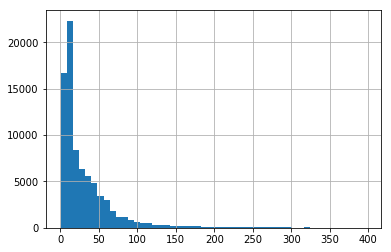

In [7]:
degree_series[degree_series < 400].hist(bins=50);

In [8]:
Counter(nx.degree_centrality(G)).most_common(5)

[('Danny Trejo', 0.013296447219210687),
 ('Richard Riehle', 0.01033060425934926),
 ('Keith David', 0.010131219858686306),
 ('Tom Arnold', 0.009956758508106222),
 ('Eric Roberts', 0.009682604957194661)]

In [9]:
nx.number_connected_components(G)

1390

In [10]:
connected_components = list(nx.connected_components(G))
connected_components_sizes = pd.Series([len(cc) for cc in connected_components])
connected_components_sizes.describe()

count     1390.000000
mean        57.732374
std       1967.915596
min          2.000000
25%          2.000000
50%          4.000000
75%          6.000000
max      73374.000000
dtype: float64

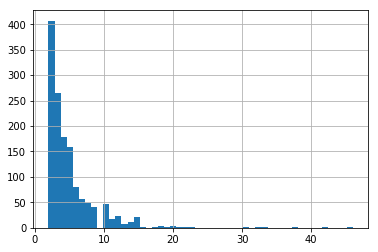

In [11]:
connected_components_sizes[connected_components_sizes < 1000].hist(bins=50);

The current graph we're using is too big to quickly compute betweenness centrality and eigenvector centrality. So, for the sake of time, we'll use a smaller graph to compute those other centrality measures.

In [12]:
G = nx.read_edgelist('data/small_actor_edges.tsv', delimiter='\t')

In [13]:
nx.number_connected_components(G)

1

In [14]:
Counter(nx.degree_centrality(G)).most_common(5)

[('David Koechner', 0.2556179775280899),
 ('Justin Long', 0.25),
 ('Danny Trejo', 0.2247191011235955),
 ('Paul Rudd', 0.21629213483146068),
 ('Jason Bateman', 0.20786516853932585)]

In [15]:
Counter(nx.betweenness_centrality(G)).most_common(5)

[('Danny Trejo', 0.017405842219758747),
 ('Justin Long', 0.012435514894496447),
 ('David Koechner', 0.01179413234010343),
 ('John Goodman', 0.011654586260132873),
 ('Samuel L. Jackson', 0.010876961690659511)]

In [16]:
Counter(nx.eigenvector_centrality(G)).most_common(5)

[('David Koechner', 0.14046338046148432),
 ('Justin Long', 0.13115316013755712),
 ('Paul Rudd', 0.1284060091198866),
 ('Will Ferrell', 0.12554471950955168),
 ('Seth Rogen', 0.11651627384579412)]

### Discovering Communities

In this assignment, you implemented parts of the Girvan-Newman algorithm. In particular, you implemented two functions: `girvan_newman_step()` and `get_modularity()`.

Both of those functions are just helpers, so we don't need to actually import them here. Instead we'll import the two user-facing functions: `find_communities_n()` and `find_communities_modularity()`.

In [17]:
from src.communities import find_communities_n, find_communities_modularity

karateG = nx.karate_club_graph()

The `find_communities_n()` function will run find n new communities. Below we'll ask it to find us _one_ new community.

In [18]:
communities = find_communities_n(karateG, 1)
print(len(communities))
print(communities)

2
[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


... but the obviously question is "HOW MANY COMMUNITIES SHOULD THERE BE?". Well, we can use modularity to "score" each set of communities to find the set of communities which is "best". Keep in mind, this is just a heuristic.

In [19]:
best_communities_set = find_communities_modularity(karateG)
print(len(best_communities_set))
print(best_communities_set)

5
[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}]


For a little more insight into what's going on, let's plot the modularity at each step (`find_communities_modularities` is just `find_communities_modularity` rewritten to return the list of all partitions & modularities instead of just the best one)

In [20]:
from src.communities import find_communities_modularities

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
comms, mods = find_communities_modularities(karateG)

In [22]:
len(comms[np.argmax(mods)])

5

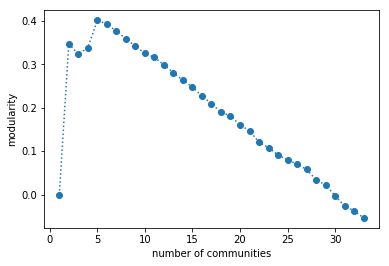

In [23]:
plt.plot(list(range(1,len(mods)+1)), mods, ':o')
plt.xlabel('number of communities')
plt.ylabel('modularity');